# PCA from scracth on SMX 

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Carreguem el Dataset

In [3]:
#Haptic_BL
SMX_h_BL = pd.read_csv('SMX_h_25.csv', names=['cub10','lat00','lat05','lat15','lat20','lon00','lon05','lon15','lon20'])

In [63]:
#Haptic_BL_Lat
SMX_h_Lat = pd.DataFrame(np.load("Lat_SMX_(10_Samples).npy"))
SMX_h_Lat

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,85.460458,1.647364,12.892178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,90.240466,8.175665,1.583869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,1.583869,0.000000,63.976330,19.268024,14.425562,0.746215,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.952381,0.710681,0.000000,66.926911,16.966210,0.000000,13.799208,0.644609,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,3.899002,0.000000,73.039755,20.506850,1.647364,0.907029,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,0.907029,6.033634,0.000000,83.670606,5.328914,4.059816,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,13.675704,5.491594,0.000000,63.413208,15.925286,1.494207,0.000000,0.000000
7,0.0,0.000000,0.000000,0.907029,0.000000,0.822702,15.927063,0.000000,74.961454,4.150519,2.447706,0.783526
8,0.0,0.000000,0.000000,0.000000,1.596990,2.550378,12.892178,3.231233,0.000000,34.732215,29.703591,15.293415
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.783526,2.927677,7.056589,0.000000,86.375065,2.857143


In [4]:
#Visual_BL
SMX_v_BL = pd.read_csv('SMX_v_1.csv', names=['cub10','lat00','lat05','lat15','lat20','lon00','lon05','lon15','lon20'])

In [5]:
#Haptic_UK
SMX_h_UK = pd.read_csv('SMX_h_25_UK.csv', names=['cub10','lat00','lat05','lat15','lat20','lon00','lon05','lon15','lon20'])

In [6]:
#Visual_UK
SMX_v_UK = pd.read_csv('SMX_v_1_UK.csv', names=['cub10','lat00','lat05','lat15','lat20','lon00','lon05','lon15','lon20'])

## Calculem la matriu de covariàncies

In [7]:
cov_mat_h_BL = np.cov(SMX_h_BL.T, bias = 0)

In [7]:
cov_mat_h_Lat = np.cov(SMX_h_Lat.T, bias = 0)

In [8]:
cov_mat_v_BL = np.cov(SMX_v_BL.T, bias = 0)

## Calculem els vectors i valors propis de la matriu de covariàncies

In [9]:
eigen_val_h, eigen_vectors_h = np.linalg.eig(cov_mat_h_BL)

In [9]:
eigen_val_h, eigen_vectors_h = np.linalg.eig(cov_mat_h_Lat)

In [45]:
print(eigen_val_h)

[2.85421378e+00 2.28250008e+00 1.61733260e+00 1.42237058e+00
 9.85434723e-01 6.98494717e-01 8.36560501e-17 3.96048228e-02
 2.25048696e-01]


In [10]:
eigen_val_v, eigen_vectors_v = np.linalg.eig(cov_mat_v_BL)

## Escollim la dimensionalitat més representativa

In [11]:
n_components=2

In [12]:
top_eigen_vectors_h = eigen_vectors_h[:,:n_components]

In [13]:
top_eigen_vectors_v = eigen_vectors_v[:,:n_components]

In [50]:
#Poden tenir components imaginàries. Agafem la part real.
top_eigen_vectors_vr = top_eigen_vectors_v.real

## Tranformem les dades hàptiques i visuals en l'espai latent hàptic

In [14]:
transformed_ppal_h_BL = np.matmul(np.array(SMX_h_BL),top_eigen_vectors_h)

In [68]:
transformed_ppal_h_Lat = np.matmul(np.array(SMX_h_Lat),top_eigen_vectors_h)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 12)

In [15]:
transformed_ppal_v_BL = np.matmul(np.array(SMX_v_BL),top_eigen_vectors_h)
#print(transformed_ppal_v)

In [16]:
transformed_ppal_h_UK = np.matmul(np.array(SMX_h_UK),top_eigen_vectors_h)

In [17]:
transformed_ppal_v_UK = np.matmul(np.array(SMX_v_UK),top_eigen_vectors_h)
#print(transformed_ppal_v)

In [55]:
#inv=np.linalg.pinv(top_eigen_vectors_v)
#predict_visual=np.matmul(transformed_ppal_h,inv)
#transformed_ppal_v2 = np.matmul(predict_visual,top_eigen_vectors_v)
#print(transformed_ppal_v2)

## Normalitzem els vectors de l'espai latent de cada mode i mirem correlació

In [18]:
result_h_BL = transformed_ppal_h_BL / np.linalg.norm(transformed_ppal_h_BL, axis=-1)[:, np.newaxis]

In [18]:
result_h_Lat = transformed_ppal_h_Lat / np.linalg.norm(transformed_ppal_h_Lat, axis=-1)[:, np.newaxis]

In [19]:
result_v_BL = transformed_ppal_v_BL / np.linalg.norm(transformed_ppal_v_BL, axis=-1)[:, np.newaxis]

In [20]:
result_h_UK = transformed_ppal_h_UK / np.linalg.norm(transformed_ppal_h_UK, axis=-1)[:, np.newaxis]

In [21]:
result_v_UK = transformed_ppal_v_UK / np.linalg.norm(transformed_ppal_v_UK, axis=-1)[:, np.newaxis]

In [60]:
#result_v2 = transformed_ppal_v2 / np.linalg.norm(transformed_ppal_v2, axis=-1)[:, np.newaxis]
#print(result_v2)

In [22]:
corr = 0
for i in range(len(result_v_BL)):
    corr += result_h_BL[i,:].dot(result_v_BL[i,:])
    
print(corr/len(result_v_BL))

0.9930916706860583


In [23]:
corr = 0
for i in range(len(result_v_UK)):
    corr += result_h_UK[i,:].dot(result_v_UK[i,:])
    
print(corr/len(result_v_UK))

0.9261205596552698


## Panderitzem les dades abans de fer el plot

In [24]:
principalSMX_h_BL = pd.DataFrame(data = transformed_ppal_h_BL
             , columns = ['principal component 1', 'principal component 2'])

In [66]:
principalSMX_h_Lat = pd.DataFrame(data = transformed_ppal_h_Lat
             , columns = ['principal component 1', 'principal component 2'])

NameError: name 'transformed_ppal_h_Lat' is not defined

In [67]:
principalSMX_v_BL = pd.DataFrame(data = transformed_ppal_v_BL
             , columns = ['principal component 1', 'principal component 2'])

In [26]:
principalSMX_h_UK = pd.DataFrame(data = transformed_ppal_h_UK
             , columns = ['principal component 1', 'principal component 2'])

In [27]:
principalSMX_v_UK = pd.DataFrame(data = transformed_ppal_v_UK
             , columns = ['principal component 1', 'principal component 2'])

In [28]:
objectes_BL =  ['cub10','lat00','lat05','lat15','lat20','lon00','lon05','lon15','lon20']

In [29]:
objectes_UK =  ['00-15','00-20','05-15','05-20','15-15','15-20','20-15','20-20']

## Plot

NameError: name 'principalSMX_h_Lat' is not defined

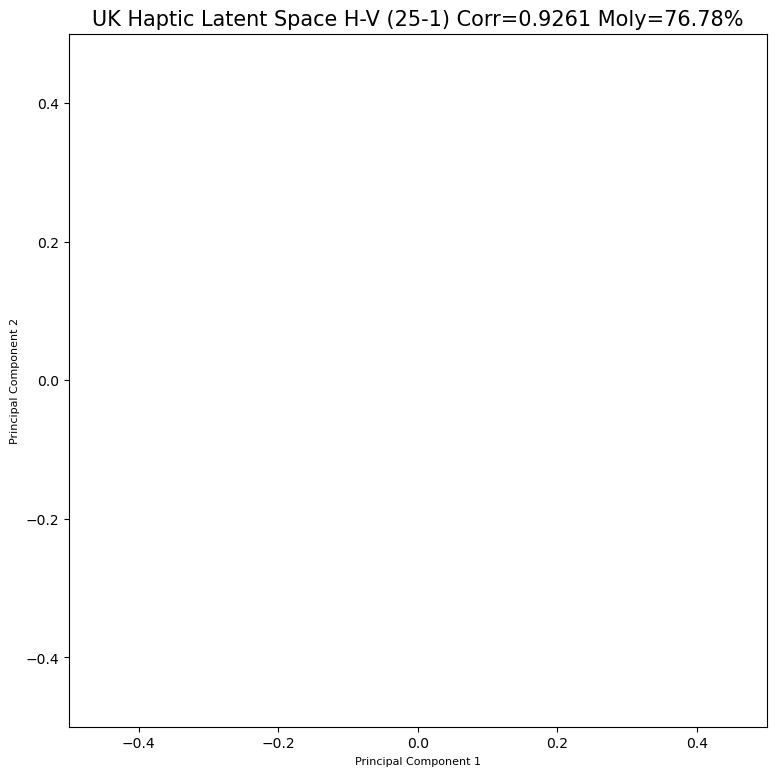

In [65]:


fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 8)
ax.set_ylabel('Principal Component 2', fontsize = 8)
ax.set_title('UK Haptic Latent Space H-V (25-1) Corr=0.9261 Moly=76.78%', fontsize = 15)
#ax.set_title('BL Haptic Latent Space H-V (25-1) Corr=0.9931 Moly=98.61%', fontsize = 15)



ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)


ax.scatter(principalSMX_h_Lat.loc[:,'principal component 1']
               , principalSMX_h_Lat.loc[:,'principal component 2']
               , c = 'tab:orange', label = 'Haptic BL'
               , s = 100)

#ax.scatter(principalSMX_h_BL.loc[:,'principal component 1']
#               , principalSMX_h_BL.loc[:,'principal component 2']
#               , c = 'tab:orange', label = 'Haptic BL'
#               , s = 100)

#ax.scatter(principalSMX_v_BL.loc[:,'principal component 1']
#           , principalSMX_v_BL.loc[:,'principal component 2']
#               , c = 'tab:green', label = 'Visual BL'
#               , s = 100)

#ax.scatter(principalSMX_h_UK.loc[:,'principal component 1']
#               , principalSMX_h_UK.loc[:,'principal component 2']
#               , c = 'tab:red', label = 'Haptic UK'
#               , s = 100)

#ax.scatter(principalSMX_v_UK.loc[:,'principal component 1']
#           , principalSMX_v_UK.loc[:,'principal component 2']
#               , c = 'tab:blue', label = 'Visual UK'
#               , s = 100)


ax.legend()
ax.grid()

#for i, label in enumerate(objectes_BL):
#    plt.annotate(label, (principalSMX_h_BL.loc[i,'principal component 1']+0.02
#               , principalSMX_h_BL.loc[i,'principal component 2']))
    

#for i, label in enumerate(objectes_BL):
#    plt.annotate(label, (principalSMX_v_BL.loc[i,'principal component 1']-0.1
#               , principalSMX_v_BL.loc[i,'principal component 2']))
    
#for i, label in enumerate(objectes_UK):
#    plt.annotate(label, (principalSMX_h_UK.loc[i,'principal component 1']+0.01
#               , principalSMX_h_UK.loc[i,'principal component 2']))
    

#for i, label in enumerate(objectes_UK):
#    plt.annotate(label, (principalSMX_v_UK.loc[i,'principal component 1']-0.03
#              , principalSMX_v_UK.loc[i,'principal component 2']))
    
